C:\Users\Shafin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


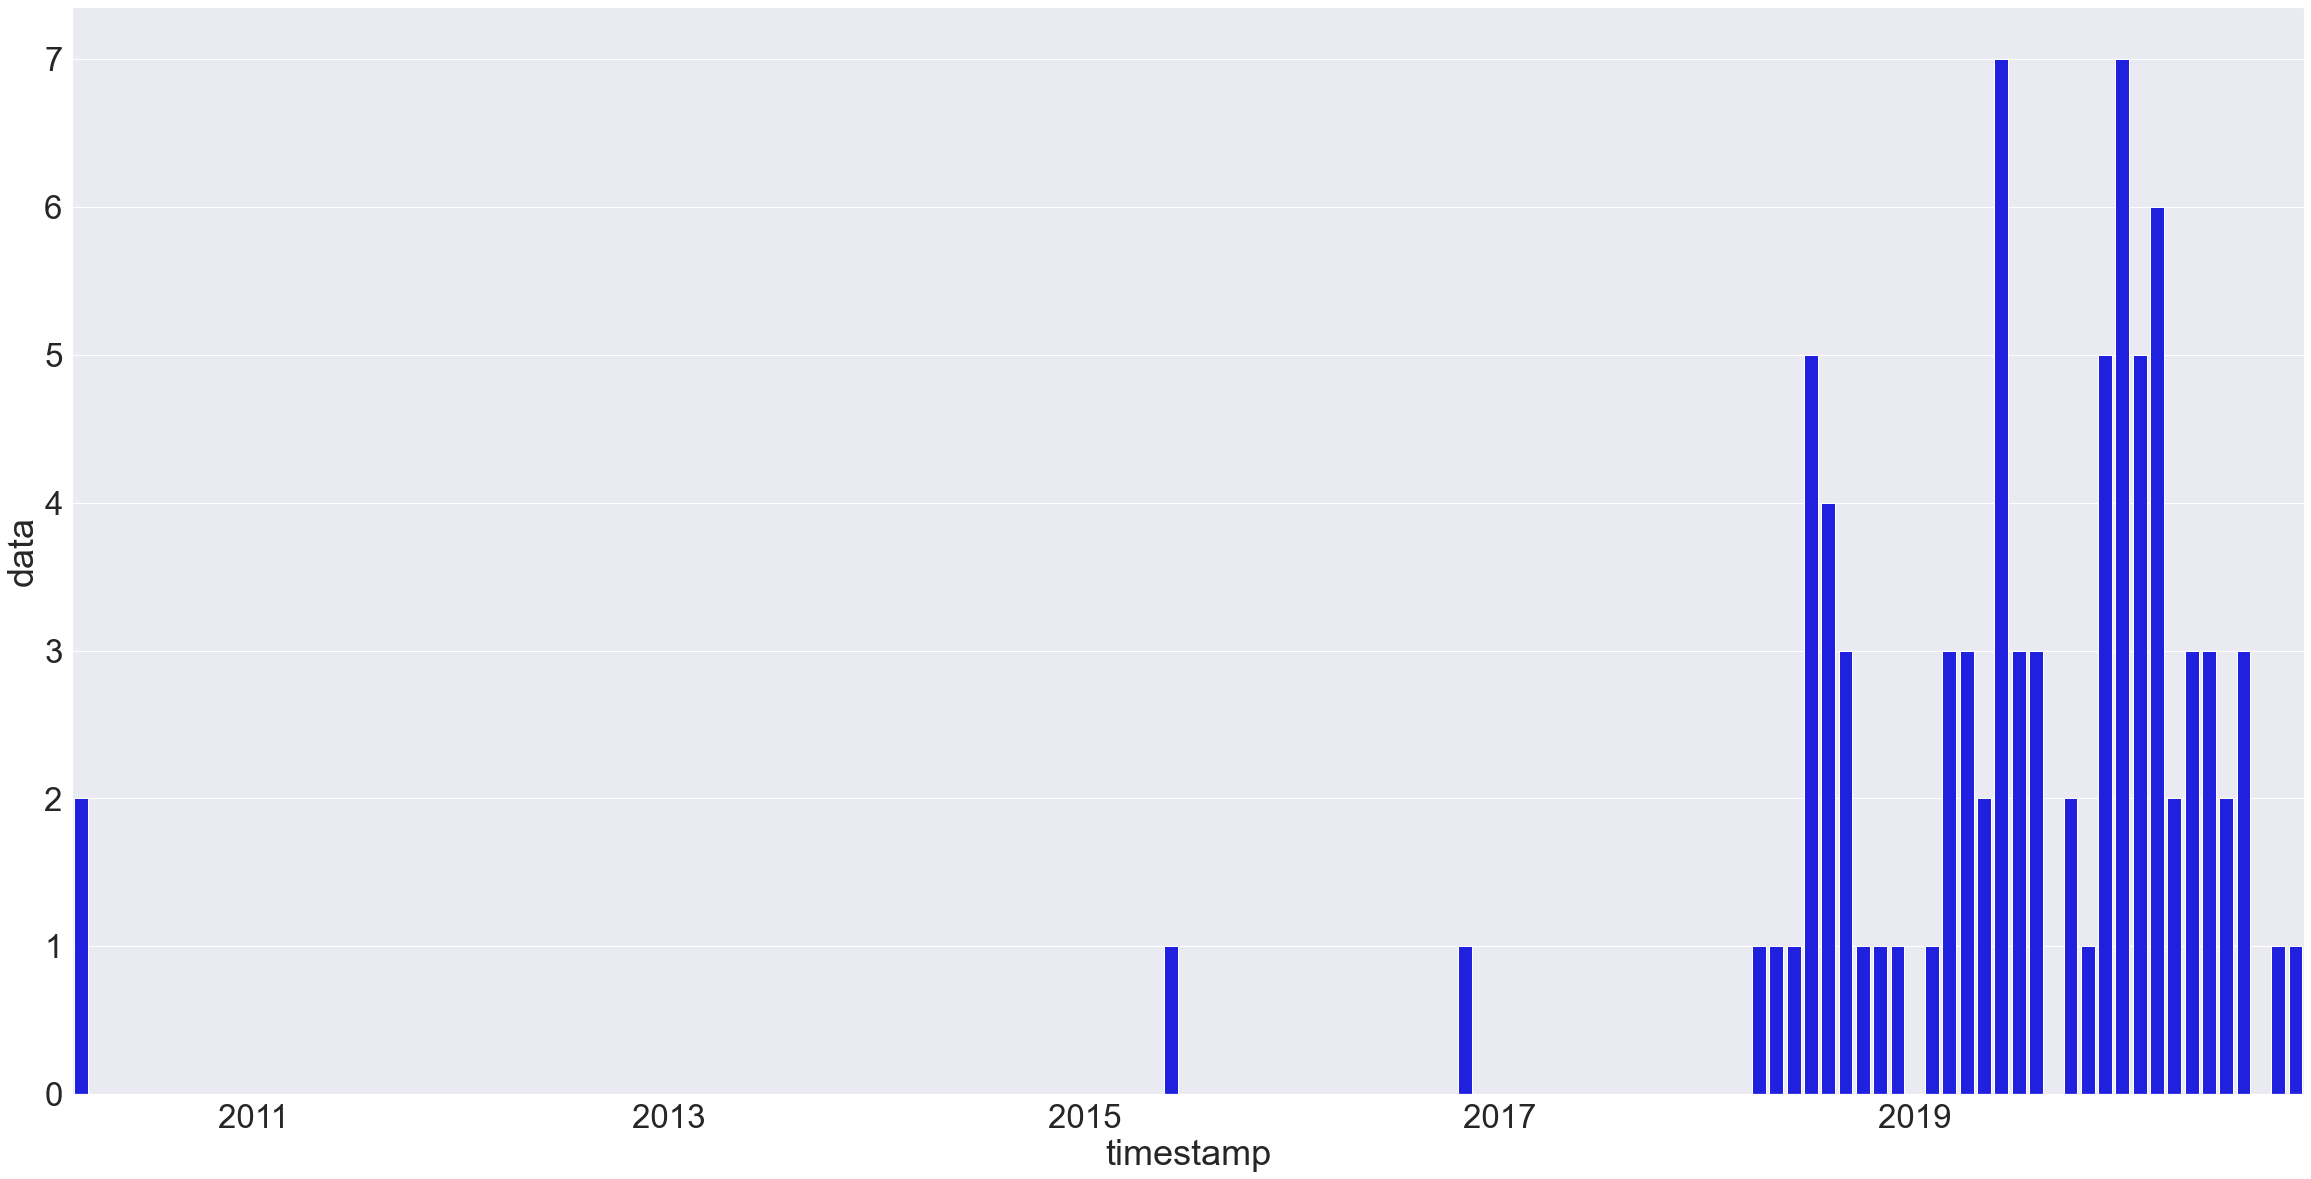

In [24]:
import pandas as pd

df = pd.read_json('C:/Users/Shafin/Desktop/silky-2021/study/python/your_posts_1.json')
df.head(10)

# making sure it's datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

#drop some unnecessary columns
df = df.drop(['attachments', 'title'], axis=1)
df.head()

#df['month'] = pd.DatetimeIndex(df['timestamp']).month
#df.head(6)

#-------Figuring Out Monthly Post Count------------
df = df.set_index('timestamp')
post_counts = df['data'].resample('MS').size()
post_counts

#-------Visualize Your Facebook Usage---------------
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set x labels
x_labels = post_counts.index
# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

sns.barplot(x_labels, post_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(10, len(x_labels), step=24)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()